# How to visualize a *simple* hypergraph

Install the **SimpleHypergraphs** package.

In [ ]:
#] add SimpleHypergraphs

Include the library package with *using*.

In [2]:
using SimpleHypergraphs

Let's initialize a simple hypergraph, containing Float weights and Int metadata for both vertices and hyperedges.

In [3]:
h = Hypergraph{Float64, Int, Int}(7,4)
h[1:3,1] .= 1.5
h[6:7,1] .= 1
h[3,4] = 2.5
h[2,3] = 3.5
h[4,3:4] .= 4.5
h[5,4] = 5.5
h[5,2] = 6.5

h

7×4 Hypergraph{Float64, Int64, Int64, Dict{Int64, Float64}}:
 1.5        nothing   nothing   nothing
 1.5        nothing  3.5        nothing
 1.5        nothing   nothing  2.5
  nothing   nothing  4.5       4.5
  nothing  6.5        nothing  5.5
 1.0        nothing   nothing   nothing
 1.0        nothing   nothing   nothing

Setting vertex and hyperedge metadata, respectively.

In [4]:
for v=1:nhv(h)
    set_vertex_meta!(h, v, v)
end

In [5]:
for he=1:nhe(h)
    set_hyperedge_meta!(h, he, he)
end

## Basic visualization parameters
To visualize a given hypergraph `h`, the user needs to specify two mandatory parameters:
1. the hypergraph `h` to draw
2. which method should be used to visualize `h`
    * `GraphBased` represents each hyperedge `he` with a *fake* vertex `fv` to which each vertex `v ∈ he` is connected.
    * `HyperNetX` renders an Euler diagram of the hypergraph where vertices are black dots and hyper edges are convex shapes containing the vertices belonging to the edge set. 

## A `GraphBased` visualization

In [7]:
SimpleHypergraphs.draw(h, GraphBased)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div2\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"4\":5.5,\"2\":6.5},{\"1\":1.0},{\"1\":1.0}],\n            [{\"6\":1.0,\"7\":1.0,\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"5\":5.5,\"4\":4.5,\"3\":2.5}],\n            \"div2\",\n            vmeta=[1,2,3,4,5,6,7],\n            hemeta=[1,2,3,4],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"#999\",\n            nodeColors=null,\n            nodeStroke=null,\n            nodeStrokes=null,\n            strokeWidth=0,\n            strokeWidths=null,\n            nodeOpacity=1,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=false,\n            nodeLabels=null,\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=false,\n            withNodeWeight=false,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

### Vertices options

* If `with_node_labels=true`, but `node_labels` is not specified, vertex ids will be used as their label.

In [8]:
SimpleHypergraphs.draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #wheter displaying or not node labels
    with_node_metadata_hover=true,
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div3\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"4\":5.5,\"2\":6.5},{\"1\":1.0},{\"1\":1.0}],\n            [{\"6\":1.0,\"7\":1.0,\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"5\":5.5,\"4\":4.5,\"3\":2.5}],\n            \"div3\",\n            vmeta=[1,2,3,4,5,6,7],\n            hemeta=[1,2,3,4],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=null,\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=false,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

* Different radii, colors, strokes, stroke-widths, opacities and labels can be specified for each node. If one of these parameters is specified, the corresponding default value for each vertex will be ignored.

In [9]:
SimpleHypergraphs.draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_colors = ["yellow", "yellow", "yellow", "blue", "red", "red", "blue"],
    node_stroke = "orange", #same stroke for each node
    node_strokes =  ["orange", "orange", "orange", "orange", "black", "black", "black"],
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    node_labels=["A","B","C","D","E","F","G"],
    with_node_metadata_hover=true,
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div4\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"4\":5.5,\"2\":6.5},{\"1\":1.0},{\"1\":1.0}],\n            [{\"6\":1.0,\"7\":1.0,\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"5\":5.5,\"4\":4.5,\"3\":2.5}],\n            \"div4\",\n            vmeta=[1,2,3,4,5,6,7],\n            hemeta=[1,2,3,4],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=[\"yellow\",\"yellow\",\"yellow\",\"blue\",\"red\",\"red\",\"blue\"],\n            nodeStroke=\"orange\",\n            nodeStrokes=[\"orange\",\"orange\",\"orange\",\"orange\",\"black\",\"black\",\"black\"],\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=[\"A\",\"B\",\"C\",\"D\",\"E\",\"F\",\"G\"],\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=false,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

* If `with_node_weight=true`, each vertex weight within the hyperedges it belongs to will be displayed.

In [10]:
SimpleHypergraphs.draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    node_labels=["A","B","C","D","E","F","G"],
    with_node_metadata_hover=true,
    with_node_weight=true
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div5\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"4\":5.5,\"2\":6.5},{\"1\":1.0},{\"1\":1.0}],\n            [{\"6\":1.0,\"7\":1.0,\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"5\":5.5,\"4\":4.5,\"3\":2.5}],\n            \"div5\",\n            vmeta=[1,2,3,4,5,6,7],\n            hemeta=[1,2,3,4],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=[\"A\",\"B\",\"C\",\"D\",\"E\",\"F\",\"G\"],\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=true,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

### Hyperedges options

In [11]:
SimpleHypergraphs.draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    with_node_metadata_hover=true,
    with_node_weight=true, #whether displaying vertices metadata on mouse hover
    he_colors=["green", "blue", "red", "yellow"], #hyperedges colors
    with_he_labels=true, #whether displaying or not hyperedge labels
    he_labels=["a","b","c","d"], #hyperedges labels
    with_he_metadata_hover=true #whether displaying hyperedges metadata on mouse hover
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div6\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"4\":5.5,\"2\":6.5},{\"1\":1.0},{\"1\":1.0}],\n            [{\"6\":1.0,\"7\":1.0,\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"5\":5.5,\"4\":4.5,\"3\":2.5}],\n            \"div6\",\n            vmeta=[1,2,3,4,5,6,7],\n            hemeta=[1,2,3,4],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=null,\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=true,\n            edgeColors=[\"green\",\"blue\",\"red\",\"yellow\"],\n            withEdgeLabels=true,\n            edgeLabels=[\"a\",\"b\",\"c\",\"d\"],\n            withHyperedgesMetadataOnHover=true\n            );\n    </script>\n    </footer>\n")

## A Euler-based visualization

**SimpleHypergraphs** integates the Python library **HyperNetX** to let the user visualize a hypergraph `h` exploiting an Euler-diagram visualization. For more details, please refer to the library [HyperNetX](https://github.com/pnnl/HyperNetX).

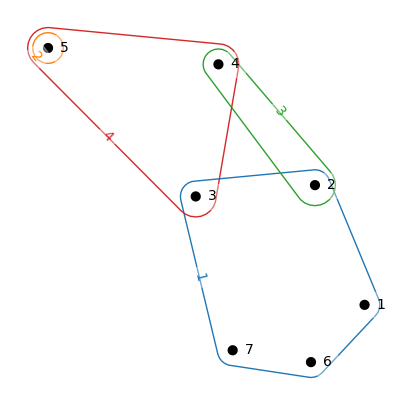

In [12]:
SimpleHypergraphs.draw(h, HyperNetX; width=5, height=5, no_border=true)